#**Delivery problem**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [162]:
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [132]:
#duplicated
data[data.duplicated()].shape

(0, 2)

In [133]:
#null
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [134]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


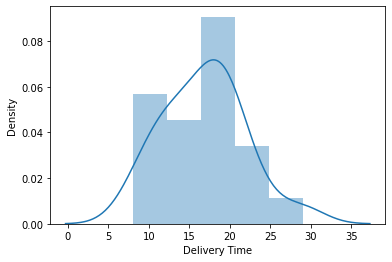

In [135]:
import seaborn as sns
sns.distplot(data['Delivery Time']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


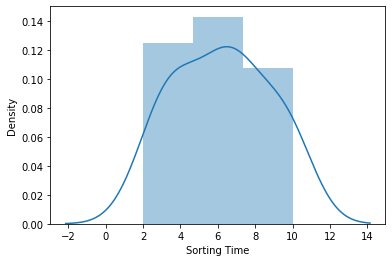

In [136]:
sns.distplot(data['Sorting Time'])

In [163]:
#rename
data=data.rename({'Delivery Time':'Delivery','Sorting Time':'Sorting'},axis=1)

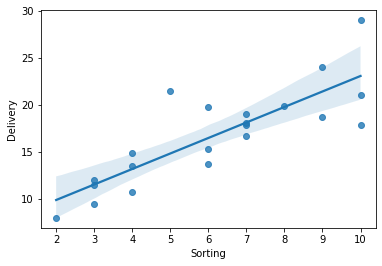

In [164]:
sns.regplot(x='Sorting',y='Delivery',data=data)

In [140]:
#fitting a linear Regression model
import statsmodels.formula.api as smf
model=smf.ols('Delivery~Sorting',data=data).fit()

In [141]:
pred=model.predict(data['Sorting'])

Text(0, 0.5, 'Delivery')

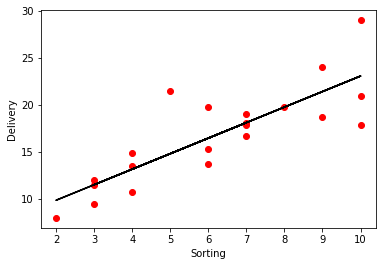

In [142]:
plt.scatter(x=data['Sorting'],y=data['Delivery'],color='red')
plt.plot(data['Sorting'],pred,color='black')
plt.xlabel('Sorting')
plt.ylabel('Delivery')

In [143]:
#coefficients
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [144]:
#t value and p value
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [145]:
#R square values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

Text(0, 0.5, 'Delivery')

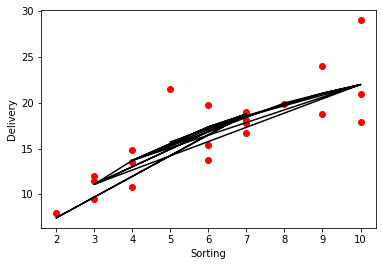

In [146]:
#log
model2=smf.ols('Delivery~np.log(Sorting)',data=data).fit()
pred2=model2.predict(pd.DataFrame(data['Sorting']))
plt.scatter(x=data['Sorting'],y=data['Delivery'],color='red')
plt.plot(data['Sorting'],pred2,color='black')
plt.xlabel('Sorting')
plt.ylabel('Delivery')

In [147]:
model2.params

Intercept          1.159684
np.log(Sorting)    9.043413
dtype: float64

In [148]:
print(model2.tvalues,'\n',model2.pvalues)

Intercept          0.472460
np.log(Sorting)    6.586789
dtype: float64 
 Intercept          0.641980
np.log(Sorting)    0.000003
dtype: float64


In [149]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

Text(0, 0.5, 'Delivery')

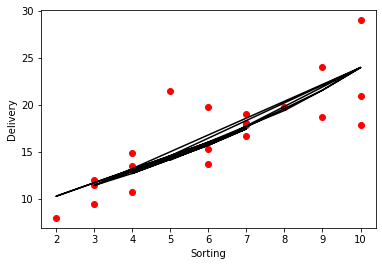

In [150]:
#exponential
model3=smf.ols('np.log(Delivery)~Sorting',data=data).fit()
pre=model3.predict(pd.DataFrame(data['Sorting']))
pred3= np.exp(pre)
plt.scatter(x=data['Sorting'],y=data['Delivery'],color='red')
plt.plot(data['Sorting'],pred3,color='black')
plt.xlabel('Sorting')
plt.ylabel('Delivery')

In [151]:
model3.params

Intercept    2.121372
Sorting      0.105552
dtype: float64

In [152]:
print(model3.tvalues,'\n',model3.pvalues)

Intercept    20.601357
Sorting       6.836088
dtype: float64 
 Intercept    1.857343e-14
Sorting      1.592708e-06
dtype: float64


In [153]:
(model3.rsquared,model3.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

In [165]:
data['Sort_squr']=data['Sorting']*data['Sorting']

In [166]:
data.dtypes

Delivery     float64
Sorting        int64
Sort_squr      int64
dtype: object

Text(0, 0.5, 'Delivery')

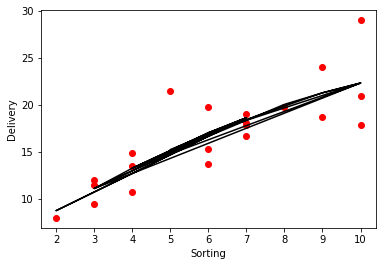

In [168]:
#quadratic
model4=smf.ols('Delivery~Sorting+Sort_squr',data=data).fit()
pred4=model4.predict(pd.DataFrame(data[['Sorting','Sort_squr']]))
plt.scatter(x=data['Sorting'],y=data['Delivery'],color='red')
plt.plot(data['Sorting'],pred4,color='black')
plt.xlabel('Sorting')
plt.ylabel('Delivery')

In [170]:
model4.params

Intercept    3.522234
Sorting      2.813002
Sort_squr   -0.093198
dtype: float64

In [171]:
print(model4.tvalues,'\n',model4.pvalues)

Intercept    0.846756
Sorting      1.925632
Sort_squr   -0.809783
dtype: float64 
 Intercept    0.408248
Sorting      0.070097
Sort_squr    0.428641
dtype: float64


In [172]:
(model4.rsquared,model4.rsquared_adj)

(0.6934396274520247, 0.659377363835583)

In [176]:
#Compare the results 

test= {"MODEL":pd.Series(["Linear","Log","Exponential","Quadratic"]),"Accuracy":pd.Series([model.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj])}
test=pd.DataFrame(test)
test
test.sort_values(['Accuracy'])

,MODEL,Accuracy
3,Quadratic,0.659377
0,Linear,0.665549
1,Log,0.679414
2,Exponential,0.695735


In [ ]:
# the Exponential model gives the best accuracy (69%)

#**Salary problem**

In [177]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [178]:
data1=pd.read_csv('Salary_Data.csv')
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [179]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [180]:
#duplicated
data1[data1.duplicated()]

,YearsExperience,Salary


In [181]:
#null
data1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [182]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


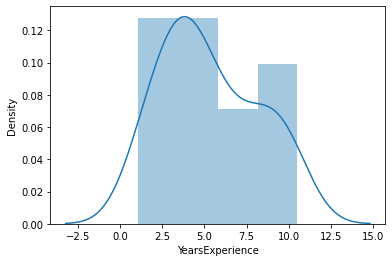

In [183]:
import seaborn as sns
sns.distplot(data1['YearsExperience']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


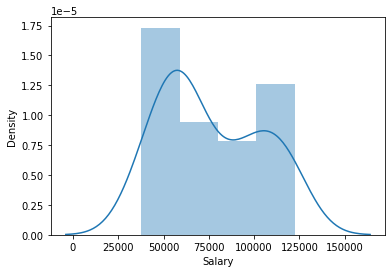

In [184]:
sns.distplot(data1['Salary']);

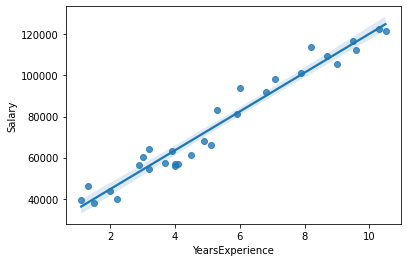

In [185]:
sns.regplot(x='YearsExperience',y='Salary',data=data1)

In [186]:
#fitting a linear regression model
import statsmodels.formula.api as smf
mode1=smf.ols('Salary~YearsExperience',data=data1).fit()

In [187]:
pred1=mode1.predict(data1['YearsExperience'])

Text(0, 0.5, 'Salary')

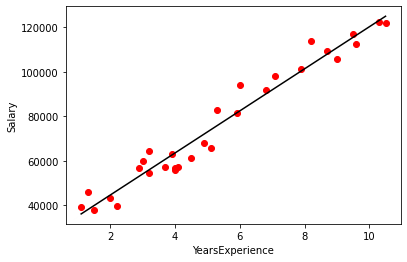

In [188]:
plt.scatter(x=data1['YearsExperience'],y=data1['Salary'],color='red')
plt.plot(data1['YearsExperience'],pred1,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [189]:
#coefficients
mode1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [190]:
#t value and p value
print(mode1.tvalues,'\n',mode1.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [191]:
#R square values
(mode1.rsquared,mode1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Text(0, 0.5, 'Salary')

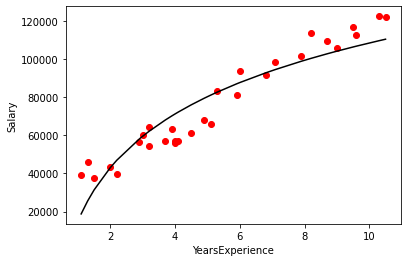

In [193]:
#log
mode2=smf.ols('Salary~np.log(YearsExperience)',data=data1).fit()
pred2=mode2.predict(pd.DataFrame(data1['YearsExperience']))
plt.scatter(x=data1['YearsExperience'],y=data1['Salary'],color='red')
plt.plot(data1['YearsExperience'],pred2,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [194]:
mode2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [195]:
print(mode2.tvalues,'\n',mode2.pvalues)

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 
 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [196]:
(mode2.rsquared,mode2.rsquared_adj)

(0.853888882875697, 0.8486706286926862)

Text(0, 0.5, 'Salary')

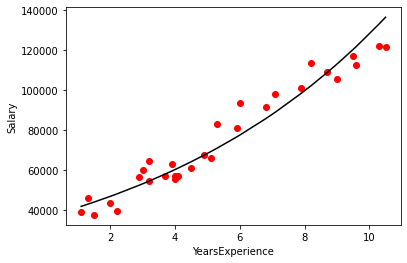

In [197]:
#exponential
mode3=smf.ols('np.log(Salary)~YearsExperience',data=data1).fit()
pre=mode3.predict(pd.DataFrame(data1['YearsExperience']))
pred3= np.exp(pre)
plt.scatter(x=data1['YearsExperience'],y=data1['Salary'],color='red')
plt.plot(data1['YearsExperience'],pred3,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [198]:
mode3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [199]:
print(mode3.tvalues,'\n',mode3.pvalues)

Intercept          273.327166
YearsExperience     19.584833
dtype: float64 
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [200]:
(mode3.rsquared,mode3.rsquared_adj)

(0.9319671194084196, 0.929537373673006)

In [201]:
data1['YrsExp_squr']=data1['YearsExperience']*data1['YearsExperience']

Text(0, 0.5, 'Salary')

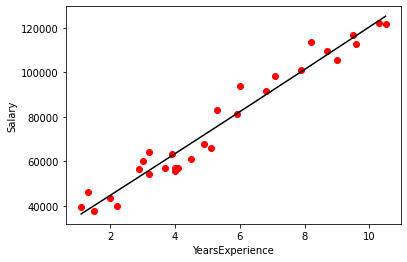

In [202]:
#quadratic
mode4=smf.ols('Salary~YearsExperience+YrsExp_squr',data=data1).fit()
pred4=mode4.predict(pd.DataFrame(data1[['YearsExperience','YrsExp_squr']]))
plt.scatter(x=data1['YearsExperience'],y=data1['Salary'],color='red')
plt.plot(data1['YearsExperience'],pred4,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [203]:
mode4.params

Intercept          26214.932677
YearsExperience     9259.283888
YrsExp_squr           16.392566
dtype: float64

In [204]:
print(mode4.tvalues,'\n',mode4.pvalues)

Intercept          5.755611
YearsExperience    5.112783
YrsExp_squr        0.107760
dtype: float64 
 Intercept          0.000004
YearsExperience    0.000022
YrsExp_squr        0.914983
dtype: float64


In [205]:
(mode4.rsquared,mode4.rsquared_adj)

(0.956975168321065, 0.953788143752255)

In [206]:
#Compare the results 

test1= {"MODEL":pd.Series(["Linear","Log","Exponential","Quadratic"]),"Accuracy":pd.Series([mode1.rsquared_adj,mode2.rsquared_adj,mode3.rsquared_adj,mode4.rsquared_adj])}
test1=pd.DataFrame(test1)
test1
test1.sort_values(['Accuracy'])

,MODEL,Accuracy
1,Log,0.848671
2,Exponential,0.929537
3,Quadratic,0.953788
0,Linear,0.955419


In [ ]:
# the Linear model is having a excellant accuracy, 95%.